In [7]:
#Kmeans
#cluster using microfocus image

In [8]:
from sklearn.cluster import KMeans

In [9]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img = imread('data/atul.png')

In [11]:
img.shape

(435, 396, 3)

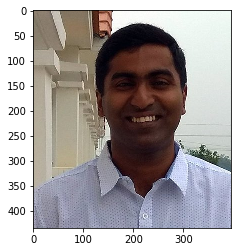

In [12]:
plt.imshow(img)

In [13]:
#Target => Convert this image from 2^24 possible colors to 4 colors
#catch => What is the 4 colors to choose
# create 4 cluster from the current image

In [14]:
img = img/255.0
#first thing to do while dealing with images is to convert to 0/1

In [15]:
kmeans = KMeans(n_clusters=4)

In [16]:
kmeans.fit(img)
#we cant , because we have to rechape to match cluster size

ValueError: Found array with dim 3. Estimator expected <= 2.

In [27]:
img.reshape(-1,3)

array([[0.53333333, 0.48235294, 0.41960784],
       [0.54901961, 0.49803922, 0.43529412],
       [0.55294118, 0.50196078, 0.43921569],
       ...,
       [0.76078431, 0.78823529, 0.90196078],
       [0.69411765, 0.72156863, 0.83529412],
       [0.58039216, 0.60784314, 0.72156863]])

In [17]:
kmeans.fit(img.reshape(-1,3))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
kmeans.cluster_centers_

array([[0.64615349, 0.63828833, 0.65563486],
       [0.48744333, 0.44544855, 0.41835692],
       [0.8756582 , 0.90048623, 0.90159684],
       [0.20672269, 0.11250849, 0.10413563]])

In [20]:
kmeans.labels_

array([1, 1, 1, ..., 2, 0, 0])

In [21]:
#replace all 0,1,2,3 values with the cluster centers

In [23]:
new_img = kmeans.cluster_centers_[kmeans.labels_]
new_img

array([[0.48744333, 0.44544855, 0.41835692],
       [0.48744333, 0.44544855, 0.41835692],
       [0.48744333, 0.44544855, 0.41835692],
       ...,
       [0.8756582 , 0.90048623, 0.90159684],
       [0.64615349, 0.63828833, 0.65563486],
       [0.64615349, 0.63828833, 0.65563486]])

In [28]:
new_img.shape
new_img = new_img*255

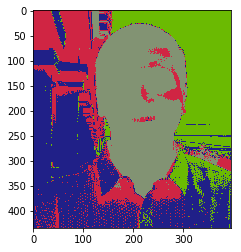

In [29]:
plt.imshow(new_img.reshape((435, 396, 3)))

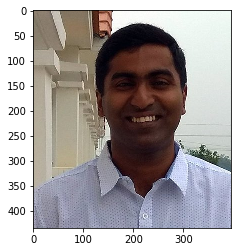

In [30]:
plt.imshow(img)

In [31]:
#how to find the optimum number of clusters

In [32]:
from sklearn.datasets import load_digits
#these are handwritten digit

In [33]:
digits = load_digits()

In [34]:
digits.data.shape

(1797, 64)

In [35]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [36]:
#cost of a cluster = distance from the center of the clusters

In [45]:
scores=[]
models = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(digits.data)
    cost = kmeans.score(digits.data)
    print (cost)
    scores.append(-1*cost)
    models.append(kmeans)
    

-2159057.2910406245
-1914619.617550103
-1730182.2600869094
-1614049.5653762275
-1497608.405261172
-1404971.504682966
-1334763.281684719
-1265087.4077169136
-1202310.6472895863
-1165162.7436324274
-1132606.2741067407
-1103356.0766162067
-1070450.1118439795
-1043435.6744531048
-1031056.7428170596
-1002029.1324933046
-990184.8331760182
-974377.2673830612
-961752.9864771462


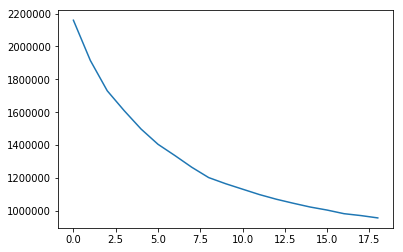

In [41]:
plt.plot(scores)

In [44]:
#elbow is around 8 (8 digits)

In [46]:
models

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [48]:
models[9]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
models[9].labels_

array([4, 6, 6, ..., 6, 8, 8])

In [50]:
models[9].cluster_centers_

array([[ 0.00000000e+00,  5.93220339e-01,  8.66666667e+00,
         1.45819209e+01,  1.40395480e+01,  7.00564972e+00,
         5.42372881e-01, -2.77555756e-16,  1.12994350e-02,
         4.18079096e+00,  1.25875706e+01,  9.09604520e+00,
         1.12090395e+01,  1.19774011e+01,  1.83615819e+00,
         1.12994350e-02,  5.64971751e-03,  1.84745763e+00,
         3.58757062e+00,  3.49717514e+00,  1.17457627e+01,
         9.93785311e+00,  8.53107345e-01,  6.24500451e-17,
        -2.81892565e-18,  3.95480226e-02,  9.03954802e-01,
         8.26553672e+00,  1.38361582e+01,  6.74576271e+00,
         3.05084746e-01, -5.63785130e-18,  0.00000000e+00,
         6.21468927e-02,  6.77966102e-01,  4.63276836e+00,
         1.17796610e+01,  1.22542373e+01,  2.31638418e+00,
         0.00000000e+00, -2.25514052e-17,  4.51977401e-01,
         1.43502825e+00,  6.94915254e-01,  4.18079096e+00,
         1.23841808e+01,  6.33898305e+00,  5.64971751e-03,
        -2.34187669e-17,  9.20903955e-01,  7.32203390e+0

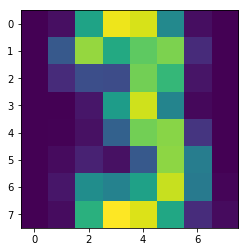

In [53]:
plt.imshow(models[9].cluster_centers_[0].reshape(8,8))

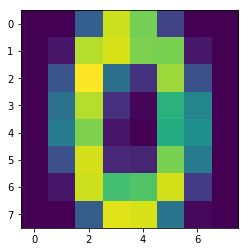

In [57]:
plt.imshow(models[10].cluster_centers_[0].reshape(8,8))

In [58]:
#if k is unknown, use Meanshift algorithm

In [59]:
from sklearn.cluster import MeanShift

In [60]:
ms = MeanShift(n_jobs=1)

In [61]:
from sklearn.datasets import make_blobs

In [62]:
X,Y = make_blobs(n_features=2, centers=2, n_samples=1000)

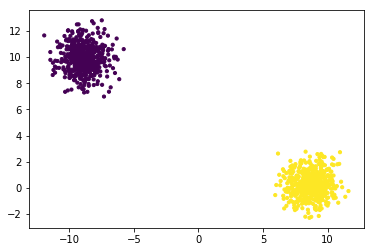

In [65]:
plt.scatter(X[:,0], X[:,1], s=10, c=Y)

In [66]:
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [68]:
ms.cluster_centers_

array([[ 8.70330072,  0.3181093 ],
       [-8.90067296,  9.89230093]])

In [69]:
ms.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,

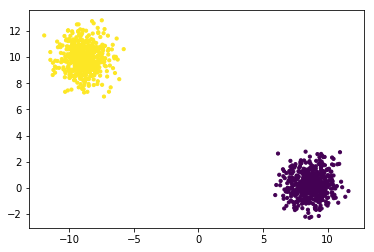

In [70]:
plt.scatter(X[:,0], X[:,1], s=10, c=ms.labels_)

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster.dbscan_:

class DBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      The maximum distance between two samples for them to be considered
 |      as in the same neighborhood.
 |  
 |  min_samples : int, optional
 |      The number of samples (or total weight) in a neighborhood for a point
 |      to be considered as a core point. This includes the point itself.
 |  
 |  metric : string, or callable
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must 